In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# 1. Hypersphere

$n$차원에서의 구를 초구(hypershpere)라고 한다. 반지름이 $r$인 2차권 구의 부피(면적)은 $S_2=\pi r^2$, 3차원은 $S_3=\frac{4}{3} \pi r^3$이다. 이를 확장하여 4차원, 5차원 구의 부피를 몬테카를로 방법을 이용하여 추측해보자. 
* $n$차원 구의 부피는 $S_n = C_n r^n$이다.
* 따라서 반지름이 1인 구를 생각하면 $S_n=C_n$과 같다.
* 몬테카를로 방법을 이용한 2차원 원의 면적 문제를 응용하여 3, 4, 5차원에서 $C_n$의 근사값을 구하여라.

In [2]:
def h_sphere(n,dim):
    count=0
    for i in range(n):
        sum=0
        for j in range(dim):
            a=random.random() 
            sum+=a**2
        if sum<1:
            count+=1

    return (count/n*2**dim)
        

In [3]:
#radius=1 
print(h_sphere(100000,3))
print(4/3*np.pi)
print(h_sphere(100000,4))
print(1/2*np.pi**2)
print(h_sphere(100000,5))
print(8/15*np.pi**2)

4.16496
4.1887902047863905
4.90912
4.934802200544679
5.24512
5.263789013914324


# 2. Particles in a box

1차원 무한히 깊은 퍼텐셜 상자 (길이 $L$) 안에 있는 양자 입자를 생각해 봅시다. 가능한 에너지 상태는 다음과 같습니다.

$$ E_n = \frac{\pi^2 \hbar^2}{2m L^2} n^2.$$

상호작용하지 않는 입자 총 $N=1000$개가 박스 안에 들어있다고 가정합시다. 또한 문제를 간단히 하기 위해 $2m=\hbar=1$, $L=\pi$로 가정합시다. 열적 요동에 의해 입자들은 각자 에너지 상태가 바뀔 수 있습니다. 단 열적 요동이 아주 크지는 않아서 상태는 한 단계씩만 변화한다고 가정해봅시다. 그렇다면 무작위로 고른 하나의 입자의 상태가 바뀌어 에너지 고유값이 한 단계 증가했다면 그 때 에너지 차이는 다음과 같습니다.
$$ \Delta E = (n+1)^2- (n)^2 = ( 2 n +1)$$
비슷한 방식으로 에너지가 감소했다면 에너지 차이는 다음과 같습니다.
$$ \Delta E =( -2 n +1)$$


초기에 모든 입자가 바닥상태(n=1)에 존재하고 있었다고 가정하고 메트로폴리스 알고리즘을 이용하여 온도($kT$)를 바꾸어가면서 
1. 총 에너지 $\sum_{i=1}^{N} E_n = \sum_i n_i^2$
2. 에너지에 따른 입자의 분포를 측정해 봅시다. (즉 볼츠만 분포를 따르는지)

In [4]:
#N=1000 
def E(beta,iter,N):
    particles_n=np.ones(N)
    for iteration in range(iter):
        i=random.randint(0,N-1)
        u=random.randint(0,2)
        if u==1: #에너지 증가 시도
            DE=2*particles_n[i]+1 
            if random.random()<np.exp(-beta*DE):
                particles_n[i]+=1
        else:
            if particles_n[i]!=1:
                particles_n[i]-=1
    return particles_n



In [5]:
a=E(1/3000,100000,1000)


In [6]:
result1=np.unique(a, return_counts = True)
#beta 1/3000

In [10]:
b=E(1/1000,100000,1000)
result2=np.unique(b, return_counts = True)
#beta 1/8000

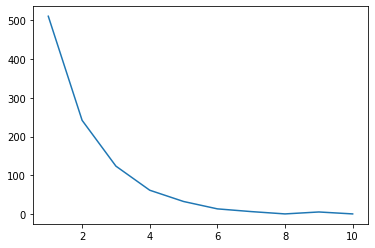

In [8]:
plt.plot(result1[0],result1[1])

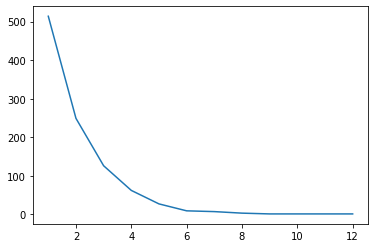

In [11]:
plt.plot(result2[0],result2[1])

입자 박스 (-3)